<a href="https://colab.research.google.com/github/giovannabetti/giovannabetti/blob/master/Aula02_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalhando com Planilhas do Excel

In [ ]:
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Amostra de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
21,Aracaju,2018-01-01,37.36,1520,2
114,Aracaju,2018-01-01,10.17,1520,5
63,Natal,2018-02-12,552.00,852,2
125,Recife,2019-03-02,37.60,983,4
70,Salvador,2019-01-01,39.06,1034,3


In [ ]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Consultando valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo por zero
#df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas
#df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
#df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
#df.dropna(how="all", inplace=True)

In [ ]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Craindo uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
73,Salvador,2019-01-01,8.39,1037,1,8.39,1.0,2019
59,Recife,2019-01-01,89.39,983,5,446.95,5.0,2019
128,Aracaju,2018-01-01,37.49,1521,2,74.98,2.0,2018
83,Fortaleza,2019-01-01,3.88,1002,6,23.28,6.0,2019
41,Salvador,2019-02-13,9.86,1035,2,19.72,2.0,2019


In [ ]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,2019,3,11
100,Recife,2019-01-01,35.11,982,4,140.44,4.0,2019,1,1
107,Natal,2019-01-02,14.70,1035,1,14.70,1.0,2019,1,2
107,Fortaleza,2019-01-01,21.90,1004,6,131.40,6.0,2019,1,1
112,Recife,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
53,Fortaleza,2019-01-01,11.48,1002,4,45.92,4.0,2019,1,1,365 days
24,Salvador,2019-01-01,15.60,1034,2,31.20,2.0,2019,1,1,365 days
155,Natal,2019-01-02,237.81,1036,3,713.43,3.0,2019,1,2,366 days
83,Recife,2019-01-01,143.61,983,6,861.66,6.0,2019,1,1,365 days
10,Natal,2018-10-27,828.00,852,4,3312.00,4.0,2018,10,27,299 days


In [ ]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
98,Fortaleza,2019-01-01,15.00,1005,2,30.00,2.0,2019,1,1,365 days,1
102,Aracaju,2018-01-01,7.29,1523,1,7.29,1.0,2018,1,1,0 days,1
66,Aracaju,2018-01-01,76.59,1523,4,306.36,4.0,2018,1,1,0 days,1
102,Recife,2019-01-01,96.50,982,7,675.50,7.0,2019,1,1,365 days,1
2,Recife,2019-02-10,12.94,983,5,64.70,5.0,2019,2,10,405 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11,434 days,1
132,Fortaleza,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,1.0,2019,3,2,425 days,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,2019,3,2,425 days,1
139,Fortaleza,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
29,Natal,2019-03-09,646.00,854,2,1292.00,2.0,2019,3,9,432 days,1
121,Recife,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days,1


# Visualização de Dados

In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

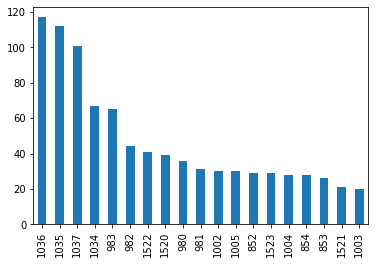

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

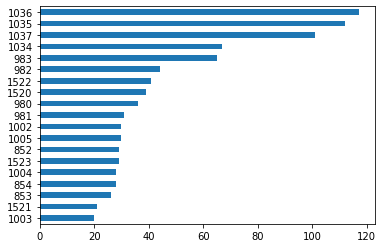

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

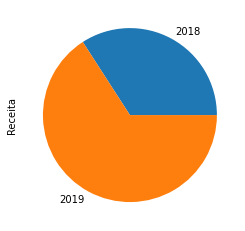

In [ ]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

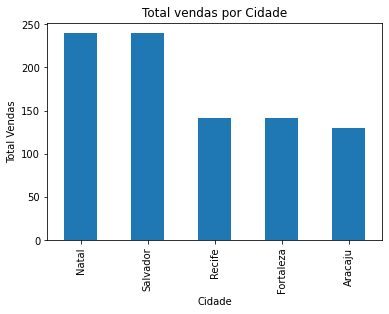

In [ ]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

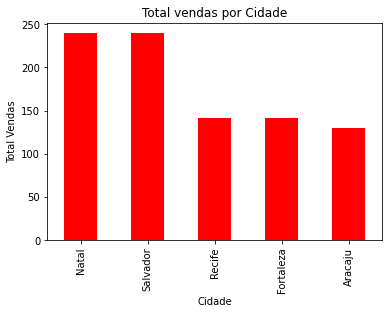

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando o estilo
plt.style.use("ggplot")

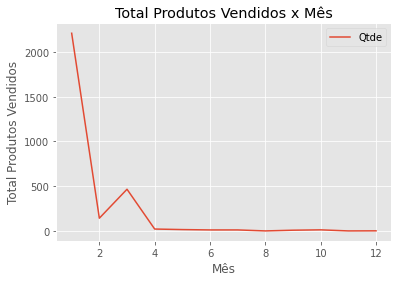

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

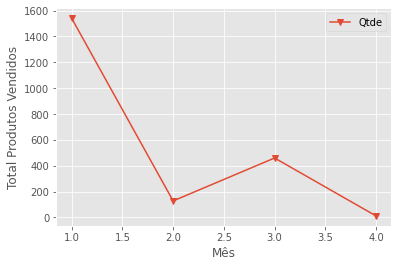

In [ ]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

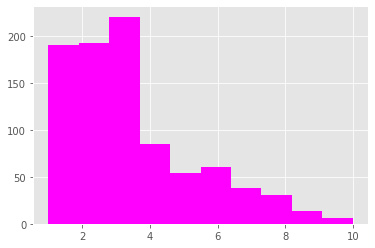

In [ ]:
#Histograma
plt.hist(df["Qtde"], color="magenta");

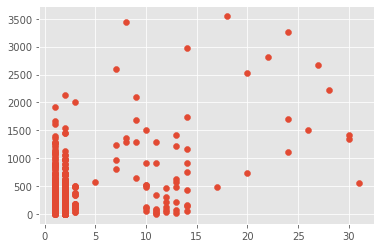

In [ ]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

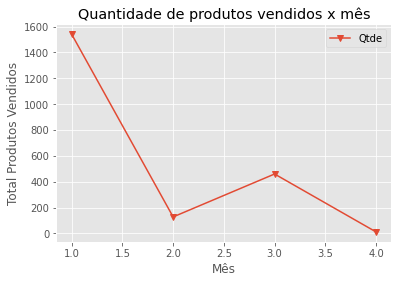

In [ ]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();
plt.savefig("grafico QTDE x MES.png")